<a href="https://colab.research.google.com/github/TrevanMorin/Physics/blob/main/RefractionLab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

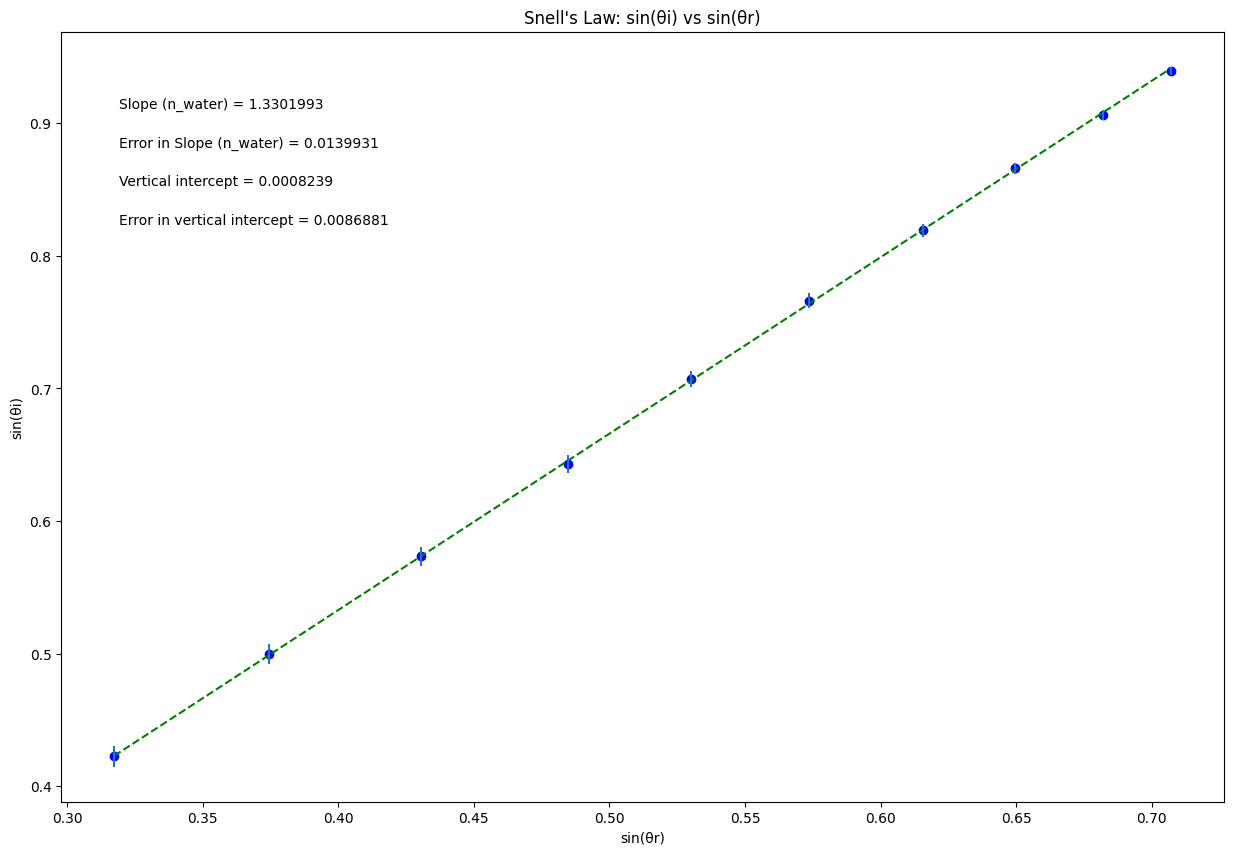

In [3]:
# PHSX 216 & 218 plotting code
# Brianna Beller
# Updated September 2023

# Import packages and libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

# ------------------------ UPDATE THIS SECTION ------------------------ #

# Incident and refracted angles (in degrees)
theta_i_deg = np.array([25, 30, 35, 40, 45, 50, 55, 60, 65, 70])
theta_r_deg = np.array([18.5, 22.0, 25.5, 29.0, 32.0, 35.0, 38.0, 40.5, 43.0, 45.0])

# Convert to sine values
xvariable_changeme = np.sin(np.radians(theta_r_deg))   # sin(θr) on x-axis
yvariable_changeme = np.sin(np.radians(theta_i_deg))   # sin(θi) on y-axis

# Estimate uncertainty in angle (±0.5°), convert to uncertainty in sin(θ)
deg_uncertainty = 0.5
err_yvariable_changeme = np.abs(np.sin(np.radians(theta_i_deg)) - np.sin(np.radians(theta_i_deg + deg_uncertainty)))

# Re-assign for plotting
x = xvariable_changeme
y = yvariable_changeme
dy = err_yvariable_changeme

# Plot labels and formatting
plot_title = "Snell's Law: sin(θi) vs sin(θr)"
x_label = "sin(θr)"
y_label = "sin(θi)"
slope_units = "n_water"
annotation_placement = 2

# ------------------------ DO NOT CHANGE BELOW THIS LINE ------------------------ #

b, m = np.polynomial.polynomial.polyfit(x, y, 1, w=dy)
fit = b + m * x

def Delta(x, dy):
    return (sum(1/dy**2))*(sum(x**2/dy**2)) - (sum(x/dy**2))**2

D = Delta(x, dy)
dm = np.sqrt(1/D * sum(1/dy**2))
db = np.sqrt(1/D * sum(x**2/dy**2))

def LLSFD2(x, y, dy):
    return sum(((y - b - m * x)/dy)**2)

N = LLSFD2(x, y, dy)

if annotation_placement in [2, 3]: xpos = 0.05
else: xpos = 0.75

if annotation_placement in [1, 2]: ypos = [.9, .85, .8, .75]
else: ypos = [.2, .15, .1, .05]

plt.figure(figsize=(15, 10))
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
plt.errorbar(x, y, yerr=dy, fmt="none")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(plot_title)

plt.annotate('Slope ({}) = {:.7f}'.format(slope_units, m), (xpos, ypos[0]), xycoords='axes fraction')
plt.annotate('Error in Slope ({}) = {:.7f}'.format(slope_units, dm), (xpos, ypos[1]), xycoords='axes fraction')
plt.annotate('Vertical intercept = {:.7f}'.format(b), (xpos, ypos[2]), xycoords='axes fraction')
plt.annotate('Error in vertical intercept = {:.7f}'.format(db), (xpos, ypos[3]), xycoords='axes fraction')

plt.show()
